In [1]:
import pandas as pd

# Create a dictionary from the data
data = {
    'x': [2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2, 1, 1.5, 1.1],
    'y': [2.4, 0.7, 2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

print(df)


     x    y
0  2.5  2.4
1  0.5  0.7
2  2.2  2.9
3  1.9  2.2
4  3.1  3.0
5  2.3  2.7
6  2.0  1.6
7  1.0  1.1
8  1.5  1.6
9  1.1  0.9


In [2]:
# tính trung bình từng chiều dữ liệu 
print(df.mean())

x    1.81
y    1.91
dtype: float64


In [3]:
# chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(df))
print(scaler.transform(df))


StandardScaler()
[[ 0.92627881  0.61016865]
 [-1.7585873  -1.506743  ]
 [ 0.52354889  1.23278973]
 [ 0.12081898  0.36112022]
 [ 1.73173864  1.35731394]
 [ 0.6577922   0.9837413 ]
 [ 0.25506228 -0.38602507]
 [-1.08737078 -1.00864614]
 [-0.41615425 -0.38602507]
 [-0.95312747 -1.25769457]]


In [4]:
# tính giá trị riêng 
import numpy as np
from numpy import linalg as LA
cov_mat = np.cov(df.T)
print('Covariance Matrix \n%s', cov_mat)


Covariance Matrix 
%s [[0.61655556 0.61544444]
 [0.61544444 0.71655556]]


In [5]:
# tính vector riêng
eig_vals, eig_vecs = LA.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)

Eigenvectors 
[[-0.73517866 -0.6778734 ]
 [ 0.6778734  -0.73517866]]


In [6]:
# giảm chiều dữ liệu xuống 1 chiều
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1'])
print(principalDf)

   principal component 1
0              -0.827970
1               1.777580
2              -0.992197
3              -0.274210
4              -1.675801
5              -0.912949
6               0.099109
7               1.144572
8               0.438046
9               1.223821


In [9]:
# chuyển dữ liệu qua hệ trục mới và in kết quả
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())


[0.96318131]
0.963181314348646


In [13]:
import pandas as pd

# Change directory to the location of the file
import os
os.chdir("C:\\Users\\LENOVO\\Downloads")

# Read the CSV file
df = pd.read_csv('wine.data', header=None)

# Rename the columns
df.columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
              'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
              'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

print(df.head())


   Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05  

In [14]:
# chia train/test 7/3
from sklearn.model_selection import train_test_split
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


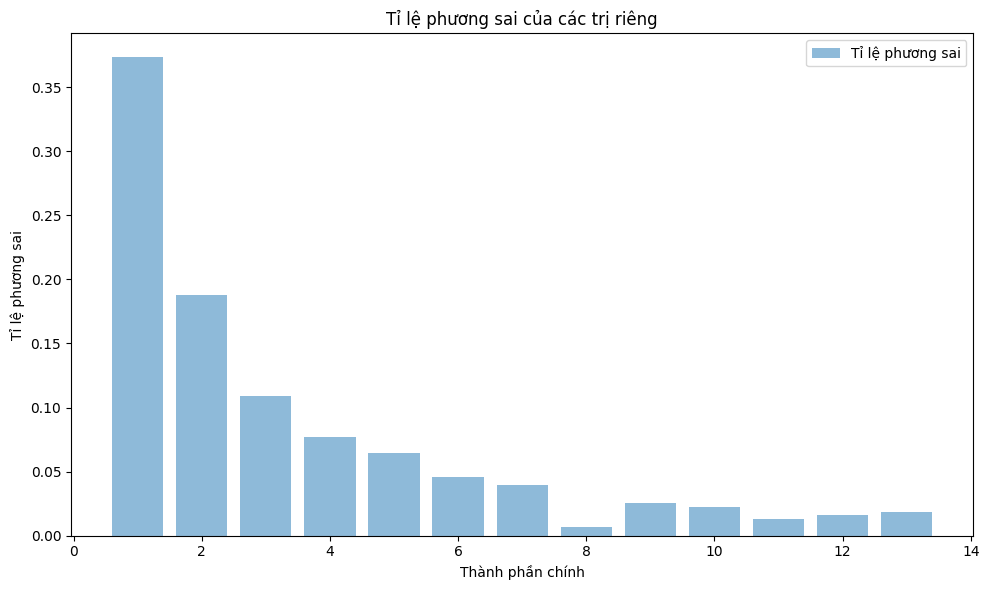

In [17]:
import matplotlib.pyplot as plt
# Tính tỉ lệ phương sai
variance_ratios = eig_vals / np.sum(eig_vals)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(variance_ratios) + 1), variance_ratios, alpha=0.5, align='center',
        label='Tỉ lệ phương sai')
plt.ylabel('Tỉ lệ phương sai')
plt.xlabel('Thành phần chính')
plt.title('Tỉ lệ phương sai của các trị riêng')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

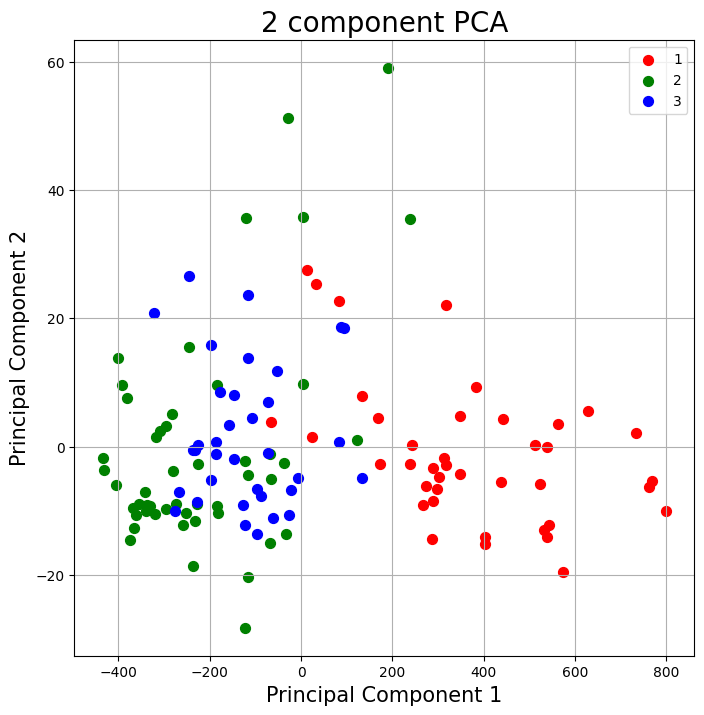

In [18]:
#Chọn 2 principal component đầu và trực quan dữ liệu này 
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, y_train.reset_index(drop=True)], axis = 1)

# Vẽ biểu đồ
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 2, 3]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
    ax.legend(targets)
    ax.grid()
plt.show()


In [27]:


# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Áp dụng PCA để giảm chiều dữ liệu xuống còn 2 đặc trưng
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# In số chiều trước và sau khi giảm chiều dữ liệu
print("Số chiều trước PCA:", X_train_std.shape[1])
print("Số chiều sau PCA:", X_train_pca.shape[1])


Số chiều trước PCA: 13
Số chiều sau PCA: 2


In [28]:
# Áp dụng giải thuật SVD để giảm chiều dữ liệu, trực quan hóa kết quả 
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
X_train_svd = svd.fit_transform(X_train_std)
X_test_svd = svd.transform(X_test_std)
 
# In số chiều trước và sau khi giảm chiều dữ liệu
print("Số chiều trước SVD:", X_train_std.shape[1])
print("Số chiều sau SVD:", X_train_svd.shape[1])




Số chiều trước SVD: 13
Số chiều sau SVD: 2


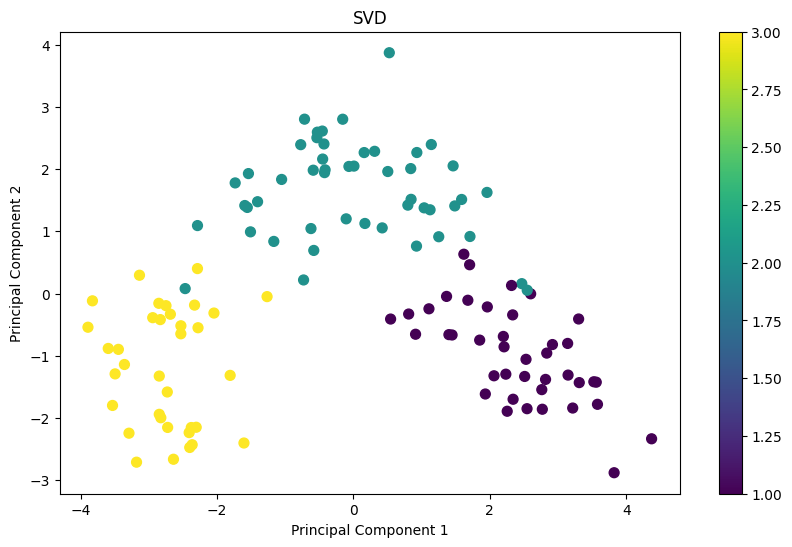

In [29]:
# trực quan hóa kết quả
plt.figure(figsize=(10, 6))
plt.scatter(X_train_svd[:, 0], X_train_svd[:, 1], c=y_train, cmap='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVD')
plt.colorbar()
plt.show()


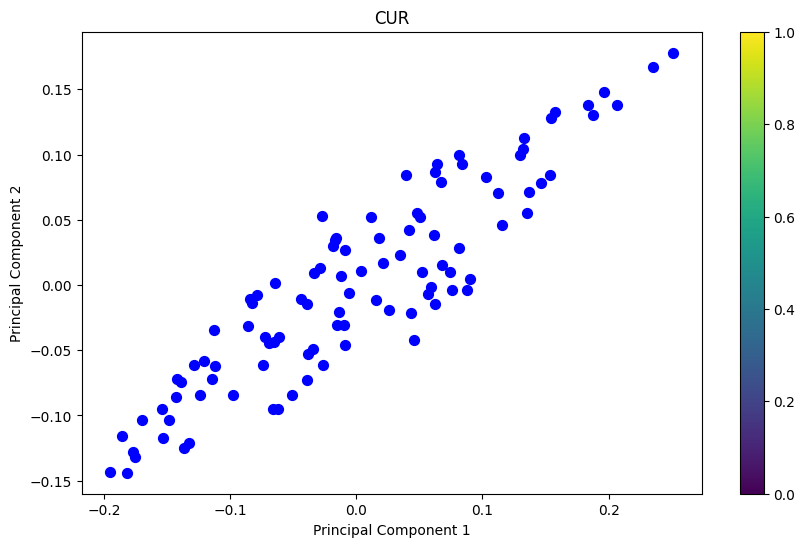

Ma trận gốc và ma trận tái tạo gần nhau: False
Ma trận tái tạo:
[[-0.14193562 -0.07240696  0.04808551 ... -0.07742863 -0.00701094
  -0.02955575]
 [-0.17569684 -0.1315592   0.03262359 ... -0.10046264 -0.09651531
   0.0182072 ]
 [-0.082766   -0.01414673  0.04605155 ... -0.04205921  0.0547264
  -0.05392363]
 ...
 [-0.03362463  0.00895334  0.02814012 ... -0.01546842  0.05302918
  -0.04111783]
 [ 0.03949386  0.08411519  0.02765855 ...  0.02858783  0.13595547
  -0.0753691 ]
 [-0.01855493  0.03011142  0.03167668 ... -0.00576445  0.08199244
  -0.05558295]]


In [51]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Hàm CUR decomposition
def cur_decomposition(matrix, r):
    C = matrix[:, :r]
    R = matrix[:r, :]
    U = np.linalg.pinv(C) @ matrix @ np.linalg.pinv(R)
    return C, U, R

# Số lượng cột được giảm chiều
r = 2

# Áp dụng CUR decomposition
C, U, R = cur_decomposition(X_std, r)

# Tính lại ma trận ban đầu
X_reconstructed = C @ U @ R

# Trực quan hóa dữ liệu kết quả
plt.figure(figsize=(10, 6))
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], c='blue', s=50)  # Thay 'c=y' bằng màu xanh 'c='blue''
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('CUR')
plt.colorbar()
plt.show()

# In kết quả
print("Ma trận gốc và ma trận tái tạo gần nhau:", np.allclose(X_std, X_reconstructed))
print("Ma trận tái tạo:")
print(X_reconstructed)


# So sánh, nhận xét về kết quả của 3 giải thuật PCA, SVD và CUR 
**PCA và SVD đều giảm chiều dữ liệu theo các thành phần chính, trong khi CUR decomposition giảm chiều dữ liệu theo các cột và hàng quan trọng nhất.**

**CUR decomposition có thể giữ lại các cột và hàng quan trọng nhất, giúp giảm chiều dữ liệu mà vẫn giữ được các thông tin quan trọng.**

**CUR decomposition có thể giữ lại các cột và hàng quan trọng nhất, giúp giảm chiều dữ liệu mà vẫn giữ được các thông tin quan trọng.**


In [53]:
# Sử dụng Logistic Regression để huấn luyện mô hình từ dữ liệu df
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình
model = LogisticRegression()

# Huấn luyện mô hình
model.fit(X_train_std, y_train)

# Dự đoán nhãn của dữ liệu test
y_pred = model.predict(X_test_std)  

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Assume X is your 2D data and y are the labels
X = np.random.rand(100, 2)
y = np.random.randint(2, size=100)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = knn.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.33      0.38        12
           1       0.27      0.38      0.32         8

    accuracy                           0.35        20
   macro avg       0.36      0.35      0.35        20
weighted avg       0.38      0.35      0.35        20

[[4 8]
 [5 3]]


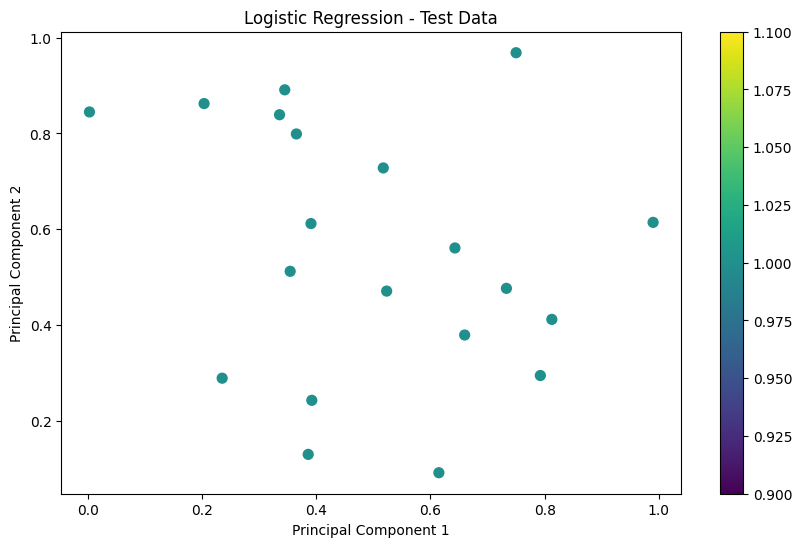

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình Logistic Regression
model = LogisticRegression()

# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train, y_train)

# Dự đoán nhãn của dữ liệu kiểm tra
y_test_pred = model.predict(X_test)

# Trực quan hóa kết quả phân loại trên tập kiểm tra
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred, cmap='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Logistic Regression - Test Data')
plt.colorbar()
plt.show()
